In [ ]:
## Numpy
# import numpy as np
# from scipy.signal import convolve2d

## JAX
import jax.numpy as np
from jax.scipy.signal import convolve2d

from matplotlib import pyplot as plt
from skimage.io import imread, imsave
from skimage.util import (img_as_float32, img_as_ubyte, random_noise)

%matplotlib inline

In [2]:
img = imread('../figures/The_Cat.jpg')

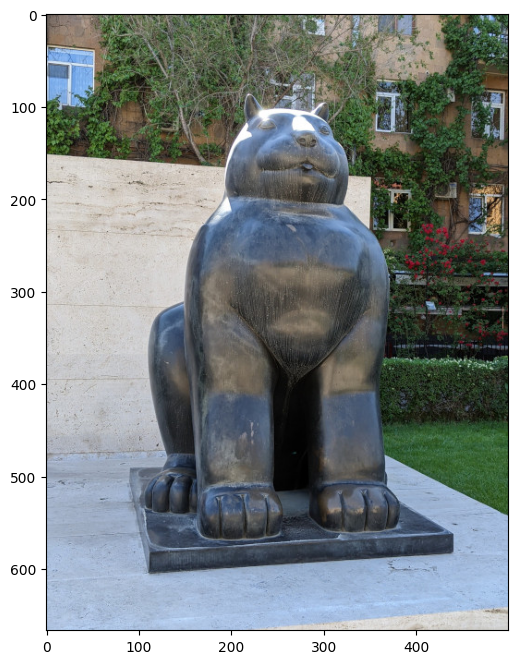

In [3]:
plt.figure(figsize=(6, 8))
plt.imshow(img)

In [4]:
print(img.dtype)
img = img_as_float32(img)
img.dtype

uint8


dtype('float32')

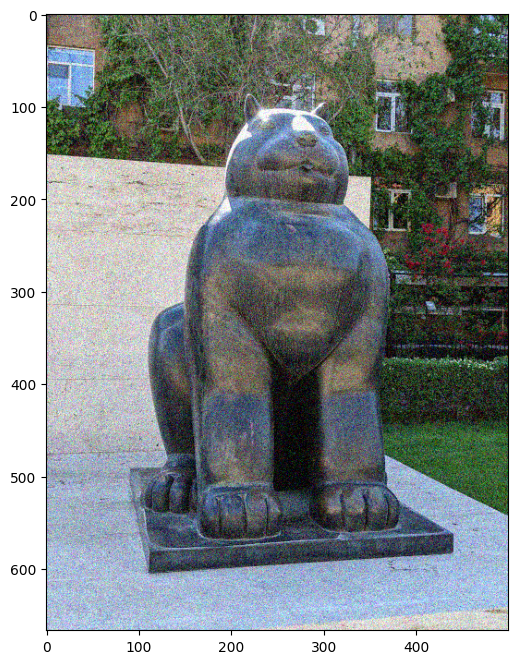

In [5]:
img_noised = random_noise(img, mode='gaussian')

plt.figure(figsize=(6, 8))
plt.imshow(img_noised)

In [6]:
kernel_blur = np.ones((5, 5))
kernel_blur /= np.sum(kernel_blur)
kernel_blur

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

In [7]:
def gaussian_kernel(kernel_size, sigma=1.0, mu=0.0):
    """A function to generate Gaussian 2D kernel."""
    center = kernel_size // 2
    x, y = np.mgrid[
        -center: kernel_size - center,
        -center: kernel_size - center]
    d = np.sqrt(np.square(x) + np.square(y))
    koeff = 1 / (2 * np.pi * np.square(sigma))
    kernel = koeff * np.exp(-np.square(d - mu) / (2 * np.square(sigma)))
    return kernel

In [8]:
kernel_gauss = gaussian_kernel(5)
kernel_gauss

array([[0.00291502, 0.01306423, 0.02153928, 0.01306423, 0.00291502],
       [0.01306423, 0.05854983, 0.09653235, 0.05854983, 0.01306423],
       [0.02153928, 0.09653235, 0.15915494, 0.09653235, 0.02153928],
       [0.01306423, 0.05854983, 0.09653235, 0.05854983, 0.01306423],
       [0.00291502, 0.01306423, 0.02153928, 0.01306423, 0.00291502]])

In [9]:
def color_convolution(image, kernel):
    """A function to apply a filter to an image. """
    channels = []
    for i in range(3):
        color_channel = image[:, :, i]
        filtered_channel = convolve2d(
            color_channel, kernel, mode='same')
        filtered_channel = np.clip(filtered_channel, 0.0, 1.0)
        channels.append(filtered_channel)
    final_image = np.stack(channels, axis=2)
    return final_image

In [10]:
img_blur = color_convolution(img_noised, kernel_gauss)

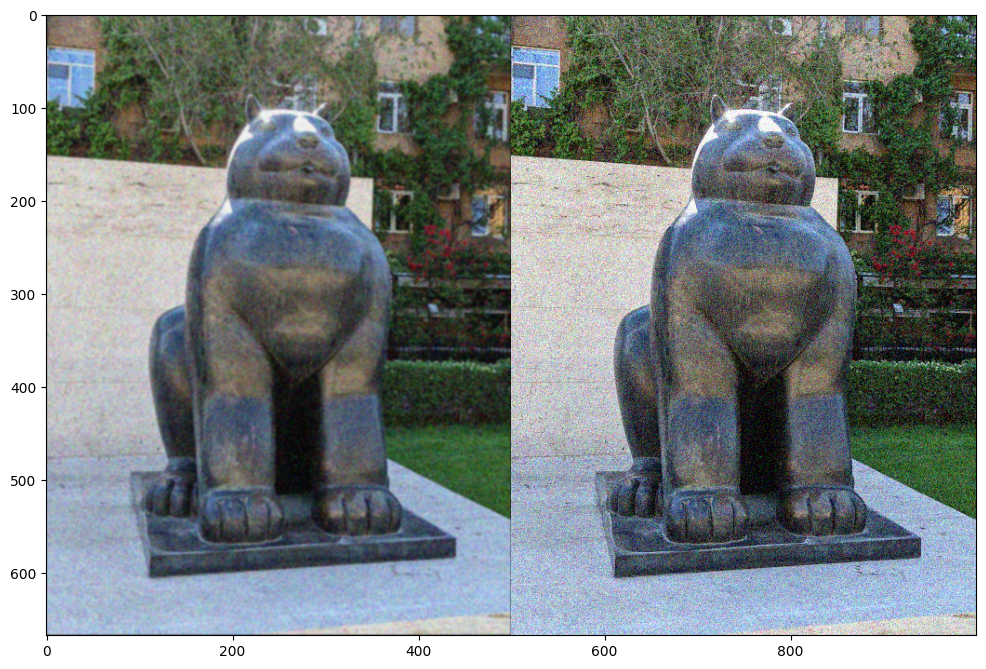

In [11]:
plt.figure(figsize=(12, 10))
plt.imshow(np.hstack((img_blur, img_noised)))

In [12]:
kernel_sharpen = np.array(
    [[-1, -1, -1, -1, -1],
     [-1, -1, -1, -1, -1],
     [-1, -1, 50, -1, -1],
     [-1, -1, -1, -1, -1],
     [-1, -1, -1, -1, -1]], dtype=np.float32
)
kernel_sharpen /= np.sum(kernel_sharpen)
kernel_sharpen

array([[-0.03846154, -0.03846154, -0.03846154, -0.03846154, -0.03846154],
       [-0.03846154, -0.03846154, -0.03846154, -0.03846154, -0.03846154],
       [-0.03846154, -0.03846154,  1.9230769 , -0.03846154, -0.03846154],
       [-0.03846154, -0.03846154, -0.03846154, -0.03846154, -0.03846154],
       [-0.03846154, -0.03846154, -0.03846154, -0.03846154, -0.03846154]],
      dtype=float32)

In [13]:
img_restored = color_convolution(img_blur, kernel_sharpen)

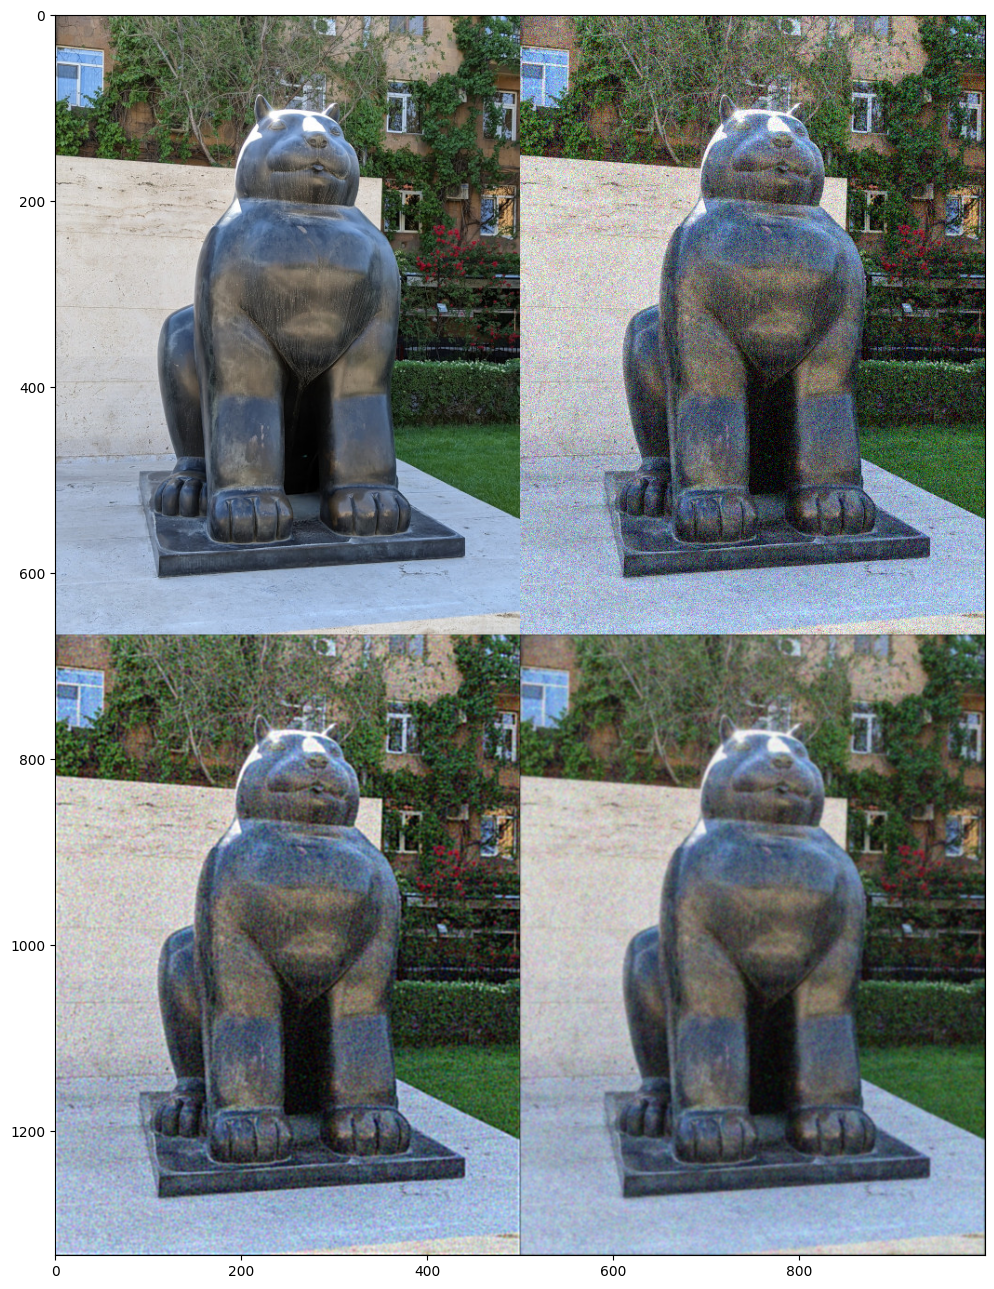

In [14]:
plt.figure(figsize=(12, 20))
plt.imshow(np.vstack(
    (np.hstack((img, img_noised)),
     np.hstack((img_restored, img_blur)))
))

In [ ]:
image_modified = img_as_ubyte(img_restored)
imsave('../figures/The_Cat_modified.jpg', arr=image_modified)